# Nagłówek 1
## Nagłówek 2
### Nagłówek 3
Zwykły tekst: Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

Przydatne linki i źródła:

http://nbviewer.jupyter.org/

http://nbviewer.jupyter.org/github/waltherg/notebooks/blob/master/2013-12-03-Crank_Nicolson.ipynb


In [1]:
enee=2

In [2]:
from IPython.display import Markdown

one = 1
two = 2
three = one + two

Markdown("""Here is a simple addition example: {one} + {two} = {three}""".format(one=enee, two=two, three=three))

Here is a simple addition example: 2 + 2 = 3

In [8]:
%%latex
\begin{align}
& I_{ygl} = \frac{I_{y0} + I_{z0}}{2} + \frac{I_{y0} - I_{z0}}{2} \cdot \cos \left({{2 \alpha_{gl}}}\right)
             - I_{y0z0} \cdot \sin \left({{2 \alpha_{gl}}}\right) \\
& I_{zgl} = \frac{I_{y0} + I_{z0}}{2} - \frac{I_{y0} - I_{z0}}{2} \cdot \cos \left({{2 \alpha_{gl}}}\right) + I_{y0z0} \cdot \sin \left({{2 \alpha_{gl}}}\right) \\
& tan {\left({{2 \alpha_{gl}}}\right)} = \frac{-2 \cdot I_{y0z0}} {I_{y0} - I_{z0}} \\
\\
\\
aaaaaaa & = b \\
aa & = b \\
\\
\\
\end{align}



\begin{gather}
I_{ygl} = \frac{I_{y0} + I_{z0}}{2} + \frac{I_{y0} - I_{z0}}{2} \cdot \cos \left({{2 \alpha_{gl}}}\right)
             - I_{y0z0} \cdot \sin \left({{2 \alpha_{gl}}}\right) \\
I_{zgl} = \frac{I_{y0} + I_{z0}}{2} - \frac{I_{y0} - I_{z0}}{2} \cdot \cos \left({{2 \alpha_{gl}}}\right) + I_{y0z0} \cdot \sin \left({{2 \alpha_{gl}}}\right) \\
tan {\left({{2 \alpha_{gl}}}\right)} = \frac{-2 \cdot I_{y0z0}} {I_{y0} - I_{z0}} \\
aaaaaaa = b \\
aaaaaaa = b \\
aaaa = b \\
\end{gather}

<IPython.core.display.Latex object>

In [57]:
%%latex
\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

<IPython.core.display.Latex object>

kąt alfa_główny = -0.24537 rad, czyli -14.06 stopni
I_y_główne = 18960.6 cm^4
I_z_główne = 5393.4 cm^4
(18960.590347161207, 5393.4096528387918, 0.043603661704764818)
18960.5903472


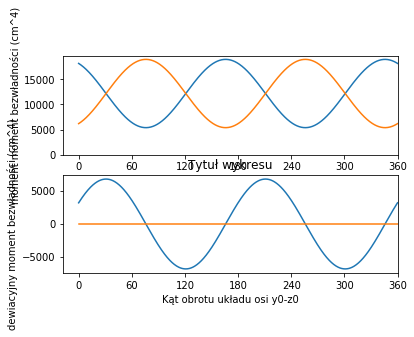

In [10]:
import numpy as np
import matplotlib.pyplot as plt


Iy0 = 18160
Iz0 = 6194
Iy0z0 = 3197


alfa_gl = np.arctan((-2 * Iy0z0) / (Iy0 - Iz0)) / 2
print("kąt alfa_główny = %.5f rad, czyli %.2f stopni" % (alfa_gl, np.degrees(alfa_gl)))

Iygl = (Iy0 + Iz0) / 2 + (Iy0 - Iz0) / 2 * np.cos(2 * alfa_gl) - Iy0z0 * np.sin(2 * alfa_gl)
print("I_y_główne = %.1f cm^4" % Iygl)
Izgl = (Iy0 + Iz0) / 2 - (Iy0 - Iz0) / 2 * np.cos(2 * alfa_gl) + Iy0z0 * np.sin(2 * alfa_gl)
print("I_z_główne = %.1f cm^4" % Izgl)

def I_func(Iy0, Iz0, Iy0z0, alfa):
    Iy = (Iy0 + Iz0) / 2 + (Iy0 - Iz0) / 2 * np.cos(2 * alfa) - Iy0z0 * np.sin(2 * alfa)
    Iz = (Iy0 + Iz0) / 2 - (Iy0 - Iz0) / 2 * np.cos(2 * alfa) + Iy0z0 * np.sin(2 * alfa)
    Iyz = (Iy0 - Iz0) / 2 * np.sin(2 * alfa) + Iy0z0 * np.cos(2 * alfa)
    return Iy, Iz, Iyz


t = np.arange(0., 360.1, 0.5)
#print(t)

print(I_func(18160, 6194, 3197, -0.24537))
a = I_func(18160, 6194, 3197, -0.24537)[0]
print(a)


# WYKRES
max_x = 360
plt.figure(1)
plt.subplot(211)  # (numrows, numcols, fignum) where fignum ranges from 1 to numrows*numcols
plt.plot(t, I_func(Iy0, Iz0, Iy0z0, np.radians(t))[0], t, I_func(Iy0, Iz0, Iy0z0, np.radians(t))[1])
#
plt.ylabel('moment moment bezwładności (cm^4)')
plt.xlim(xmax=max_x)
plt.ylim(ymin=0)
plt.xticks(np.arange(min(t), max(t)+1, 60.0))  # ticks every 60 degrees
#
#
plt.subplot(212)
plt.plot(t, I_func(Iy0, Iz0, Iy0z0, np.radians(t))[2])
plt.plot([0, 360], [0, 0])
#
plt.xlabel('Kąt obrotu układu osi y0-z0')
plt.ylabel('dewiacyjny moment bezwładności (cm^4)')
plt.xlim(xmax=max_x)
plt.xticks(np.arange(min(t), max(t)+1, 60.0))
#
#
plt.title('Tytuł wykresu')
plt.show()

In [11]:
from example import addd
addd(12)

14


## Import functions in python file located in the same directory:
First execute to %run line

In [3]:
%run example.py

In [4]:
addd(15)

17


## Import functions in python file located in the same directory:
First execute to %run line

In [24]:
%run database_profiles.py
%run heat.py
%run material_prop.py

Steel emissivity equal to 0.7. Open "heat.py" to change.


HE 200 A
shadow effect!
Selected profile: HE 200 A
Its Am/V ratio is: 211.0
Its Am/V (box) ratio is: 145.0
k_sh = : 0.618
Data taken from Arcelor Mittal

Time: 0.0s | Gas temp: 20.0 degC | Element temp: 20.0 degC
Time: 5.0s | Gas temp: 96.5 degC | Element temp: 20.4 degC
Time: 10.0s | Gas temp: 147.0 degC | Element temp: 21.2 degC
.
.
.
.
.
Time: 1785.0s | Gas temp: 840.5 degC | Element temp: 800.3 degC
Time: 1790.0s | Gas temp: 841.0 degC | Element temp: 801.2 degC
Time: 1795.0s | Gas temp: 841.4 degC | Element temp: 802.2 degC
Time: 1800.0s | Gas temp: 841.8 degC | Element temp: 803.2 degC

Temperatura przekroju HE 200 A po 1800.0s (30.0 minut): 803.2 stopni Celsjusza


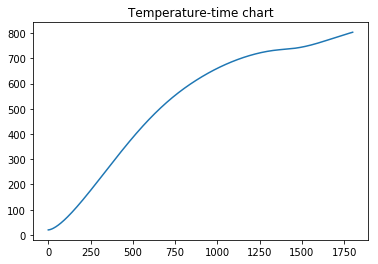

In [27]:
# -*- coding: utf-8 -*-
"""
Obliczanie temperatury elmentow stalowych zgodnie z PN EN 1993-1-2
UWAGA: emisyjnosc stali ustawic w module heat.py
       "em_steel = 0.8" lub "em_steel = 0.7"

Projekt w fazie realizacji
Mozna dodawac nowe profile w "database_profiles.py": skladnia: 'NAZWA (np. HEB200)': [Am/V, Am/V(box)]
lub recznie wpisac wartosci w liniach AmV oraz AmVb
Nazwy profili w bazie zgodne z Arcelor Mittal
http://sections.arcelormittal.com/products-services/products-ranges.html
np. z serii IPE 180:
IPE AA 180, IPE A 180, IPE 180, IPE O 180
z serii HE 200:
HE 200 AA, HE 200 A, HE 200 B, HE 200 C, HE 200 M

Z uwagi na pewne niedociągnięcia serwisu, ktorego uzywam do trzymania skryptu skrypt w wersji on-line jest daleki od idealu.
- kiepska jakos wykresu (wiele nieobslugiwanych funkcji, chocby grid)
- brak wsparcia python3 w wersji darmowej
- dostepnosc tylko wybranych modulow
"""
# Ustawiane przez uzytkownika:
profile_type = 'dwuteownik'  # 'dwuteownik' lub 'rura'
profile_name = 'HE 200 A'  # wypelnic jesli dwuteownik / patrz opis wyzej. Symbole jak w database_profiles
grubosc_scianki_rury = 6.0  # wypelnic jesli rura
czas_analizy = 1800  # czas analizy w sekundach
# czy drukowac na koncu liste czas-temperatura:
drukuj = 'nie'  # 'tak lub cokolwiek innego'
ekspozycja = 'ISO-834'
# mozliwe ekspozycje: 'ISO-834', 'LP', 'ISO-834-1800-dacay-1800'

#####################################
# Koniec ustawien uzytkownika
# Ponizej nie trzeba niczego zmieniac
#####################################
from math import log10
import numpy as np
import database_profiles as dp
import material_prop as mp
#import interpolate_mine as interp
import heat


    
if profile_type == 'dwuteownik':
    AmV = dp.data_miner(profile_name)[3]
    AmVb = dp.data_miner(profile_name)[5]
    print(profile_name)
    one_sided_list = ['HEB200-1', 'HEA200-1', 'HEA200-1-simplified',
                      'HE_300_simplified', 'HE_300_accurate',
                      'IPE_200_simplified', 'IPE_200_accurate']
    if profile_name in one_sided_list:
        k_sh = AmVb / AmV
        print('one side!')
    else:
        k_sh = 0.9 * AmVb / AmV
        print('shadow effect!')
    #
    print("Selected profile: %s" % profile_name)
    print("Its Am/V ratio is: %.1f" % AmV)
    print("Its Am/V (box) ratio is: %.1f" % AmVb)
    print("k_sh = : %.3f" % k_sh)
    print("Data taken from Arcelor Mittal\n")
elif profile_type == 'rura':
    AmV = 1.0 / (grubosc_scianki_rury / 1000.)
    k_sh = 1.0
    print("Selected profile: tube with t = %.1f\n" % grubosc_scianki_rury)


temp_steel = 20
dtime = 5

def print_output():
    print("Time: %.1fs |" % time,
          "Gas temp: %.1f degC |" % temp,
          "Element temp: %.1f degC" % temp_steel)

def gas_temp(ekspozycja, time):
    if ekspozycja == 'ISO-834':
        temp = 20 + 345 * log10(8 * (time / 60.0) + 1)
    elif ekspozycja == 'LP':
        a = [0.0, 238.9, 316.0, 396.7, 499.4, 598.3, 697.0, 795.7, 850.9, 894.9, 946.1, 1044.8, 1099.5, 1146.8, 1194.1, 1245.1, 1333.2, 1439.7, 1494.7, 1590.4, 1697.0, 1800.1, 1892.2, 1965.7, 2090.7]
        b = [20.0, 20.0, 27.9, 53.1, 103.2, 169.2, 253.3, 348.7, 348.9, 362.6, 403.5, 505.8, 571.7, 653.4, 748.7, 814.6, 851.1, 860.4, 881.0, 863.0, 867.8, 838.6, 818.4, 811.7, 821.1]
        print(time)        
        temp = interp.void_interpolate(time, a, b)
    elif ekspozycja == 'ISO-834-1800-dacay-1800':
        decay_start = 1800
        decay_end = decay_start + 1800
        max_temp = 20 + 345 * log10(8 * (decay_start / 60.0) + 1)
        if time <= 1800:
            temp = 20 + 345 * log10(8 * (time / 60.0) + 1)
        else:
            # temp = 20  # testing
            if time < decay_end:
                procent = (time - decay_start) / (decay_end - decay_start)
                temp = max_temp - procent * (max_temp - 20)
            else:
                temp = 20
    return temp

time_list = []
steelTemp_list = []
time_steelTemp_list = []

for time in range(0, czas_analizy + 1, dtime):
    temp = gas_temp(ekspozycja, time)
    h_net = heat.HF_conv(temp, temp_steel) + heat.HF_rad(temp, temp_steel)
    dtemp = k_sh * (AmV / (mp.steel_sh(temp_steel) * 7850)) * h_net * dtime
    temp_steel += dtemp
    if time <= 10:
        print_output()
    elif time > czas_analizy * 0.99 and time > czas_analizy - 100:
        print_output()
    elif time % 300 == 0:
        print(".")
    else: pass
    time_list.append(time)
    steelTemp_list.append(temp_steel)
    time_steelTemp_list.append([time, temp_steel])

if profile_type == 'dwuteownik':
    file_name = profile_name
elif profile_type == 'rura':
    file_name = 'rura' + str(grubosc_scianki_rury)
else:
    file_name = 'something_went_wrong'

#np.savetxt('LP_time_' + file_name + '.txt', time_list, fmt='%.1f')
#np.savetxt('LP_steelTemp_' + file_name + '.txt', steelTemp_list, fmt='%.1f')


if profile_type == 'dwuteownik':
    print("\nTemperatura przekroju %s po %.1fs (%.1f minut): "
          "%.1f stopni Celsjusza"
          % (profile_name, czas_analizy, czas_analizy / 60, temp_steel))
elif profile_type == 'rura':
    print("\nTemperatura rury o grubosci %.1f mm po %.1fs (%.1f minut): "
          "%.1f stopni Celsjusza"
          % (grubosc_scianki_rury, czas_analizy, czas_analizy / 60, temp_steel))

import matplotlib.pyplot as plt
#plt.figure()
plt.title('Temperature-time chart')
plt.plot(time_list, steelTemp_list)
#plt.grid(True)
plt.show()

if drukuj == 'tak':
  for item in time_steelTemp_list:
    print(item[0], item[1])

## Zabawy z obrazkami:
Youtube<br>
Ścieżka względna<br>
ścieżka bezwzględna<br>
obrazek zaszyty w markdown<br>
GIF<br>
**Jak ładować obrazki do markdown etc.:** https://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook


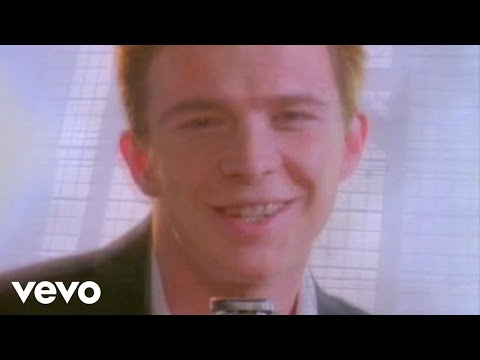

In [8]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("dQw4w9WgXcQ")
display(vid)

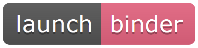

In [9]:
# ścieżka względna
from IPython.display import Image
Image("img.png")

In [13]:
# link z internetu
from IPython.display import Image
Image(url= "http://i1.memy.pl/obrazki/f181926927_jak_pacze_to_umiem.jpg", width=200, height=200)

In [11]:
# obsługa GIF - link z internetu
from IPython.display import Image
Image(url= "https://media.giphy.com/media/3o7aTskHEUdgCQAXde/giphy.gif")

### ścieżka względna i plik zaszyty w markdown
"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum".
![title](img.png)
"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum".
<br><br>
<img src="img.png",width=250, align="left"><br><br><br><br>
"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum".
![title](img.png)
"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum".
![Image of Wisdomcat](http://i1.memy.pl/obrazki/f181926927_jak_pacze_to_umiem.jpg)

## Dalej nie ma już czego szukać
![Image of Wisdomcat](https://media.giphy.com/media/3o7aTskHEUdgCQAXde/giphy.gif)